In [1]:
# Import packages we need for data exploration.
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
matplotlib.rcParams['figure.figsize'] = (20,10)

## Data Cleaning

In [2]:
# Load the data into a pandas dataframe.
df = pd.read_csv(r"C:\Users\USER\Everything\House_price_prediction_repository\Bengaluru_House_Data.csv")
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [13]:
#  rows, columns
df.shape

(13320, 9)

In [14]:
# Number of houses in each area type. 
df.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [15]:
# Get rid of unnecessary columns.
df1 = df.drop(['area_type', 'availability', 'society', 'balcony'], axis=1)
df1.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [16]:
# A count of the null data points in each column.
df1.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [17]:
# Drop every row that has a null data point.
df2 = df1.dropna()
print(df2.shape)
df2.isnull().sum()

(13246, 5)


location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [11]:
df2['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [18]:
# I'll create a new column, that takes the number from size column, e.g '2 BHK' will be '2' in our new column.
df2['bhk'] = df2['size'].apply(lambda x: int(x.split(' ')[0]))
df2.head()

<ipython-input-18-23f9ef841ce2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['bhk'] = df2['size'].apply(lambda x: int(x.split(' ')[0]))


,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [19]:
df2.bhk.unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [20]:
# The entries in the dataset where bhk is > 20.
df2[df2.bhk>20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [21]:
df2.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [27]:
# This function takes x (total_sqft column) and convert each data point to a float, and returns False if it's not feasible. 
def convertToFloat(x):
    try:
        float(x)
    except:
        return False
    return True

In [36]:
# The entries in the dataset where the total_sqft is not a float; using the (~).
df2[~df2['total_sqft'].apply(convertToFloat)]

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
...,...,...,...,...,...,...
12975,Whitefield,2 BHK,850 - 1060,2.0,38.190,2
12990,Talaghattapura,3 BHK,1804 - 2273,3.0,122.000,3
13059,Harlur,2 BHK,1200 - 1470,2.0,72.760,2
13265,Hoodi,2 BHK,1133 - 1384,2.0,59.135,2


In [37]:
# This function takes x (total_sqft) and takes the float average of the range data points.
def convertRangeToFloat(x):
    numbers = x.split(' - ')
    if len(numbers)==2:
        return (float(numbers[0]) + float(numbers[1]))/len(numbers)
    try:
        return float(x)
    except:
        return None # We return None here, if the value cannot be converted to float.

In [38]:
convertRangeToFloat('2334 - 7890')

5112.0

In [39]:
# I'll create a new dataframe and apply the above function to the total_sqft column.
df3 = df2.copy()
df3.total_sqft = df3.total_sqft.apply(convertRangeToFloat)
df3.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [40]:
# Entries in the 30th index.
df3.loc[30]

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
bhk                   4
Name: 30, dtype: object

In [41]:
# A little comparison of the function's ouput.
(2100+2850)/2

2475.0

In [42]:
df3.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [43]:
# A new column 'price per sqft'; the quotient of price/total_sqft.
df4 = df3.copy()
df4['price_per_sqft'] = df4['price']*100000/df4['total_sqft'] # I multiply the price by 100000; 1 lakh = 100000
df4.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [44]:
# Number of unique locations in the dataset.
len(df4.location.unique())

1304

In [45]:
# Number of houses in each location.
df4.location = df4.location.apply(lambda x: x.strip())

location_stats = df4.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats.head(30)

location
Whitefield                  535
Sarjapur  Road              392
Electronic City             304
Kanakpura Road              266
Thanisandra                 236
Yelahanka                   210
Uttarahalli                 186
Hebbal                      176
Marathahalli                175
Raja Rajeshwari Nagar       171
Bannerghatta Road           152
Hennur Road                 150
7th Phase JP Nagar          149
Haralur Road                141
Electronic City Phase II    131
Rajaji Nagar                106
Chandapura                   98
Bellandur                    96
KR Puram                     88
Hoodi                        88
Electronics City Phase 1     87
Yeshwanthpur                 85
Begur Road                   84
Sarjapur                     81
Kasavanhalli                 79
Harlur                       79
Hormavu                      74
Banashankari                 74
Ramamurthy Nagar             73
Kengeri                      73
Name: location, dtype: int64

In [46]:
# Number of locations that have <= 10 houses in the dataset.
len(location_stats[location_stats<=10])

1052

In [47]:
minor_locations = location_stats[location_stats<=10]
minor_locations

location
Basapura                 10
1st Block Koramangala    10
Gunjur Palya             10
Kalkere                  10
Sector 1 HSR Layout      10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Karnataka Shabarimala     1
whitefiled                1
Name: location, Length: 1052, dtype: int64

In [48]:
# I'm creating a new location variable "other", for all the locations that have less than 10 houses.
df4.location = df4.location.apply(lambda x: 'other' if x in minor_locations else x)
len(df4.location.unique())

242

In [49]:
df4.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


In [50]:
# The entries in the dataset where the quotient of the total_sqft/bhk < 300.
df4[df4.total_sqft/df4.bhk<300].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [51]:
df4.shape

(13246, 7)

## Outlier filtering

In [52]:
# I create a new dataframe where I filter entries that have a (total_sqft/bhk) < 300 .
df5 = df4[~(df4.total_sqft/df4.bhk<300)]
df5.shape

(12502, 7)

In [53]:
# Some statistical info about the price_per_sqft column.
df5.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [55]:
# I'll create a function that filters out overly expensive and overly cheap houses.
def filter_outliers1(dataframe):
    ''' 
        This function takes the dataframe, and groupby the location.

        For each location, we calculate the mean and standard deviation of the 
        price_per_sqft in that location.

        Then we use the mean and standard deviation to filter entries that lie beyond some 
        specified threshold.
    '''
    df = pd.DataFrame()
    for location, minidf in dataframe.groupby('location'):
        mean = np.mean(minidf.price_per_sqft)
        std = np.std(minidf.price_per_sqft)
        filtered_df = minidf[(minidf.price_per_sqft>(mean-std)) & (minidf.price_per_sqft<=(mean+std))]
        df = pd.concat([df, filtered_df], ignore_index=True)
    return df

In [58]:
# Since I'm trying to build a generic model it is only fair that I filter
# extreme data points that may have bad effects on my model.
df6 = filter_outliers1(df5)
df6.shape

(10241, 7)

In [59]:
# Number of house in each bhk size.
df6.groupby('bhk')['bhk'].agg('count')

bhk
1      518
2     4756
3     4002
4      745
5      108
6       62
7       19
8       16
9        8
10       3
11       2
13       1
16       1
Name: bhk, dtype: int64

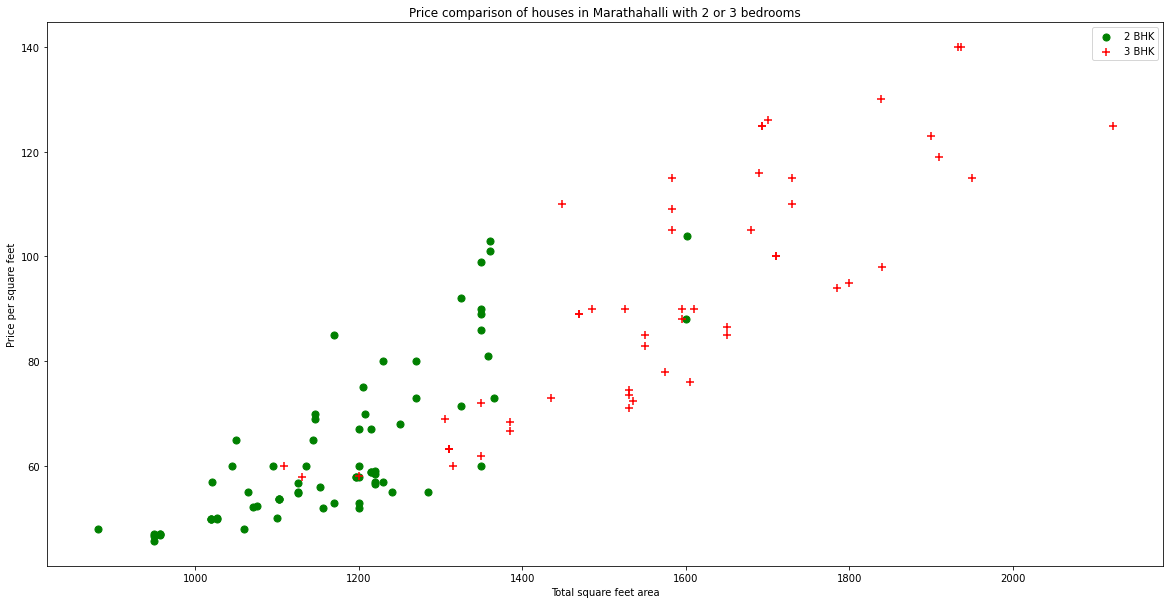

In [60]:
# Most houses have 2 or 3 bhk, let's see how the prices of 2 bhk and 3 bhk vary in the same location.
def scatter_plot(dataframe, location):
    bhk2 = dataframe[(dataframe.location==location) & (dataframe.bhk==2)]
    bhk3 = dataframe[(dataframe.location==location) & (dataframe.bhk==3)]
    plt.scatter(bhk2.total_sqft, bhk2.price, color='green', label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft, bhk3.price, marker='+', color='red', label='3 BHK', s=50)
    plt.xlabel('Total square feet area')
    plt.ylabel('Price per square feet')
    plt.title(f'Price comparison of houses in {location} with 2 or 3 bedrooms')
    plt.legend()

scatter_plot(df6, 'Marathahalli')

See how some 3 bhk houses cost less than 2 bhk houses with the same total square feet area.<br>
Normally you'll think that for more bhk the price of a given house with the same sqft should go higher.<br>
<br>
So I'll go ahead and write a function that filters these outliers.

In [96]:
def filter_outliers2(dataframe):
    '''First, I create an array of indices of the outliers to filter/remove; filter_indices.
       
       Second, I group the dataframe by location; location_df
       
       Third, I create an empty dictionary 'bhk_stats', and then group 'location_df' by 'bhk'
       
       Fourth, I get the mean and standard deviation of the price per square feet of all the house with a particular bhk,
       and in the same Location. Also the count of the houses.
       
       Now, I use the information in this bhk_stats dictionary to get the indices of the entries where the price per 
       square feet of a given house, in a given location with more bhk, is less than that of a house with less bhk.
      
    '''
    filter_indices = np.array([])
    for location, location_df in dataframe.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                filter_indices = np.append(filter_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return dataframe.drop(filter_indices, axis='index')

df7 = filter_outliers2(df6)
df7.shape

(7329, 7)

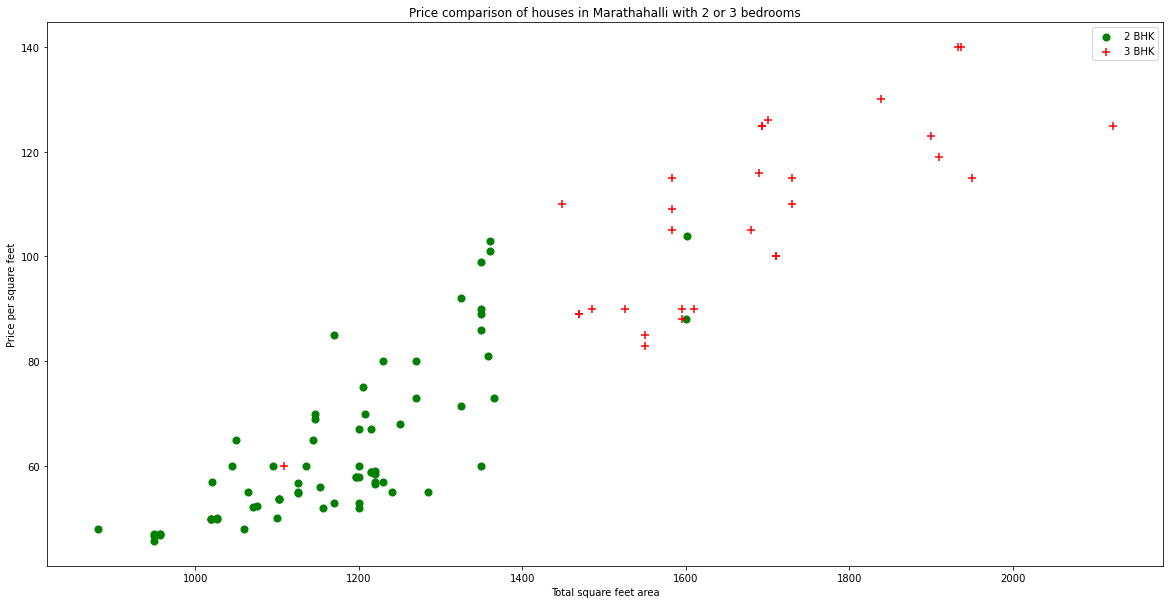

In [97]:
# I'd run the scatter plot function again to see how well we did with filtering the outlier. 
scatter_plot(df7, 'Marathahalli')

Text(0, 0.5, 'Count')

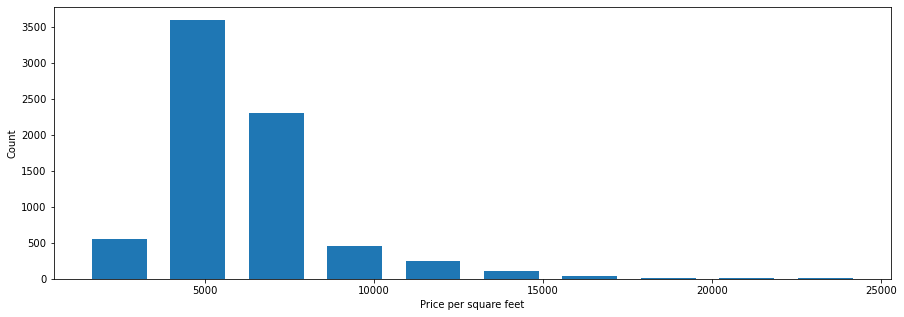

In [98]:
# I can now use a histogram to see the distribution of my data.
matplotlib.rcParams['figure.figsize'] = (15, 5)
plt.hist(df7.price_per_sqft, rwidth=.7)
plt.xlabel('Price per square feet')
plt.ylabel('Count')

It seems to have a sort of bell curve shape.

In [99]:
# Lets see the bath columns, there might need to be some cleaning there.
df7.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [100]:
# The entries in the dataset where bath is number of bath is greater than 10.
df7[df7.bath>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8486,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8575,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9308,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9639,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


Text(0, 0.5, 'Counts')

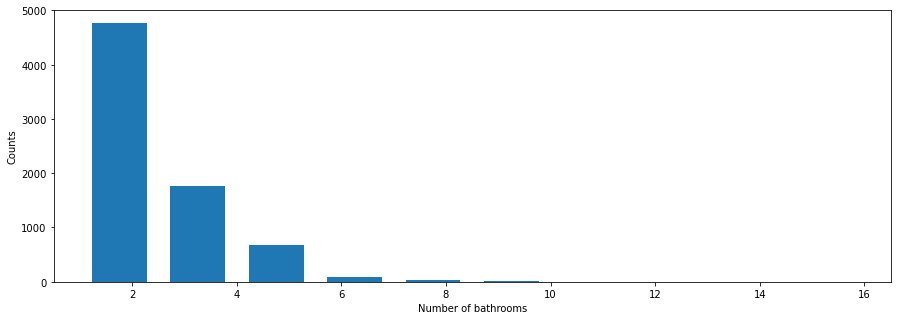

In [101]:
# I'll use a histogtram to see the most common number of bathrooms in the dataset.
plt.hist(df7.bath, rwidth=.7)
plt.xlabel('Number of bathrooms')
plt.ylabel('Counts')

In [102]:
# Now there are some house that have an absurd number of bathrooms,
# Entries in the dataset where the number of bathrooms is more than the bhk+2.
df7[df7.bath>df7.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6711,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8411,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [103]:
# I create a new dataframe where the number of the bathroom is not more than the bhk+2(prefered threshold).
df8 = df7[df7.bath<df7.bhk+2]
df8.shape

(7251, 7)

In [104]:
# I'll drop the size and price_per_sqft columns as they aren't really important features.
df9 = df8.drop(['size', 'price_per_sqft'], axis=1)
df9.head(5)

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


There are over 200 locations in the dataset, and they are all string data type.<br>
Machine learning models don't understand string for the most part, so<br>
I will use a one-hot encoding approach facilitated by pd.get_dummies, to create a new dataframe of<br>
zeros and ones that represent the location in a certain way.<br>
If the location is 'Electric City', the 'Electric City' column will have a value 1 and every other columns will be zeros.

In [106]:
dummies = pd.get_dummies(df9.location)
dummies.tail()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
10232,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10233,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10236,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10237,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10240,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [107]:
# We concatenate our dummies-dataframe to out main dataframe.
df10 = pd.concat([df9, dummies.drop('other', axis=1)], axis=1)
df10.head()

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [198]:
df11 = df10.drop(['location'], axis=1)
df11.head()

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [199]:
df11.shape

(7251, 245)

In [200]:
X = df11.drop('price', axis=1)
X

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10232,1200.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10233,1800.0,1.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10236,1353.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10237,812.0,1.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [201]:
Y = df11.price
Y

0        428.0
1        194.0
2        235.0
3        130.0
4        148.0
         ...  
10232     70.0
10233    200.0
10236    110.0
10237     26.0
10240    400.0
Name: price, Length: 7251, dtype: float64

In [202]:
from sklearn.model_selection import train_test_split as tts
X_train, X_test, Y_train, Y_test = tts(X, Y, test_size=.15, random_state=12345, shuffle=True)

In [203]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit(X_train, Y_train)
accuracy = (clf.score(X_test, Y_test))*100
print(f'Accuracy of the model: {round(accuracy)}%')

Accuracy of the model: 85%


In [204]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=10, test_size=.15, random_state=12345)
cv_accuracy = cross_val_score(LinearRegression(), X, Y, cv=cv)
print(f'Accuracy using cross validation: {cv_accuracy}')

Accuracy using cross validation: [0.84574963 0.8504132  0.86120851 0.85797196 0.79773308 0.87320179
 0.80235925 0.8717147  0.82539754 0.84870908]


In [205]:
def predictPrice(location, sqft, bath, bhk):
    loc_index = np.where(X.columns==location)[0][0]
    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1
    return clf.predict([x])[0]

In [206]:
predictPrice('Electronic City', 900, 3, 3)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


42.944495663413

In [207]:
predictPrice('Electronic City', 1200, 4, 4)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


69.81237560731199

In [208]:
predictPrice('Indira Nagar', 1200, 4, 4)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


205.92395820701324

In [211]:
import pickle
with open('house_prediction_model.pickle', 'wb') as f:
    pickle.dump(clf, f)

In [213]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open('coulmns.json', 'w') as f:
    f.write(json.dumps(columns))

In [92]:
np.pi/3.14

1.0005072145190423